In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import clip
from PIL import Image

## 0) utils

In [2]:
def plot_ensemble_preds(imgs, idx, M, preds_all=None, pix_std=None):
    for i in idx:
        fig, axs = plt.subplots(1, M + 2, figsize=(20, 4))
        for m in range(M):
            axs[m].imshow(np.transpose(imgs[m, i], (1,2,0)))
            axs[m].set_title(f"m={m}")
            if preds_all is not None:
                axs[m].set_title(f"{preds_all[m, i]}")
            axs[m].axis("off")
        axs[M].imshow(np.transpose(np.mean(imgs[:, i], axis=0), (1, 2, 0)))
        axs[M].set_title("mean-per-pixel")
        axs[M].axis("off")
        axs[M + 1].imshow(np.std(imgs[:, i], axis=0).mean(axis=0), cmap="gray")
        if pix_std is not None:
            axs[M + 1].set_title(f"std-per-pixel {pix_std[i]:.4f}")
        else:
            axs[M + 1].set_title("std-per-pixel")
        axs[M + 1].axis("off")

        plt.show()

## 1) Plot Ensemble Generations

In [8]:
import pickle

# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_b100.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_b1.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_854.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_991.pkl', 'rb') as f:
with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_22.pkl', 'rb') as f:
# with open('logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_854.pkl', 'rb') as f:
    data = pickle.load(f)


In [9]:
data = data.cpu().numpy()
data = np.transpose(data, (1, 0, 2, 3, 4))

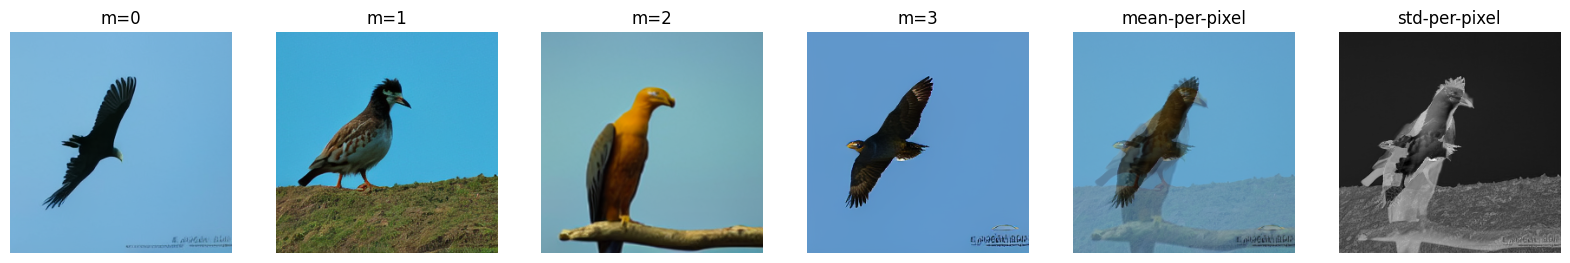

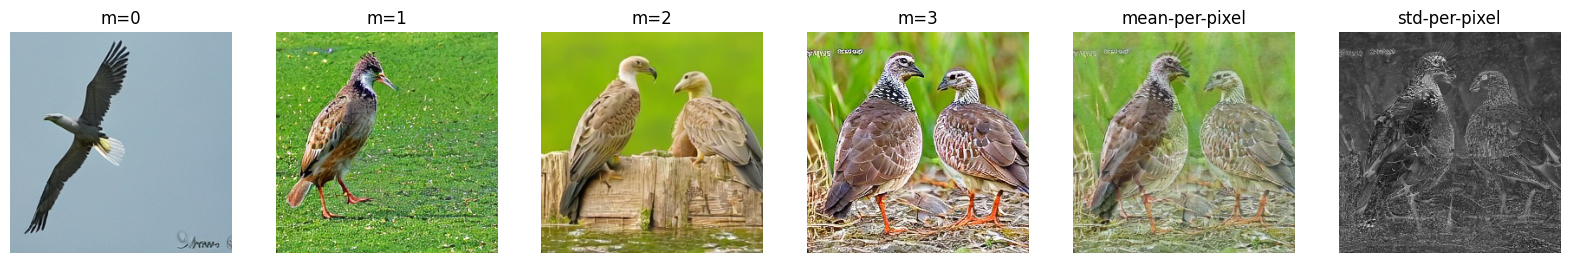

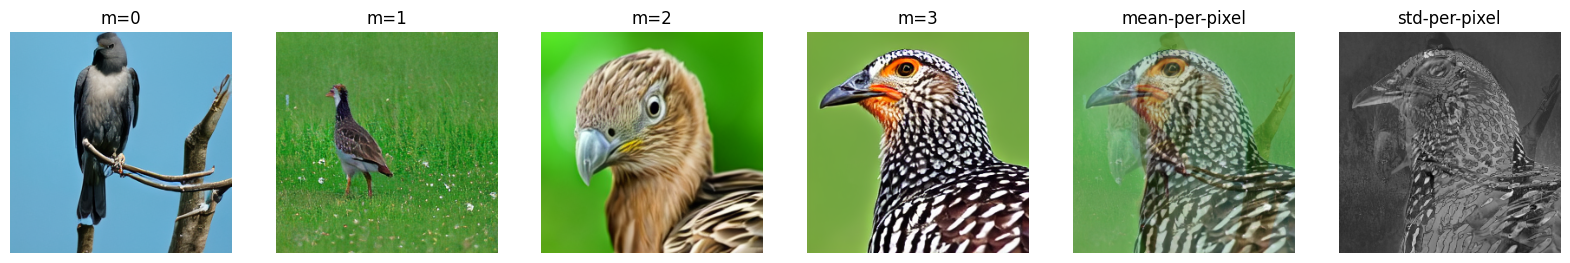

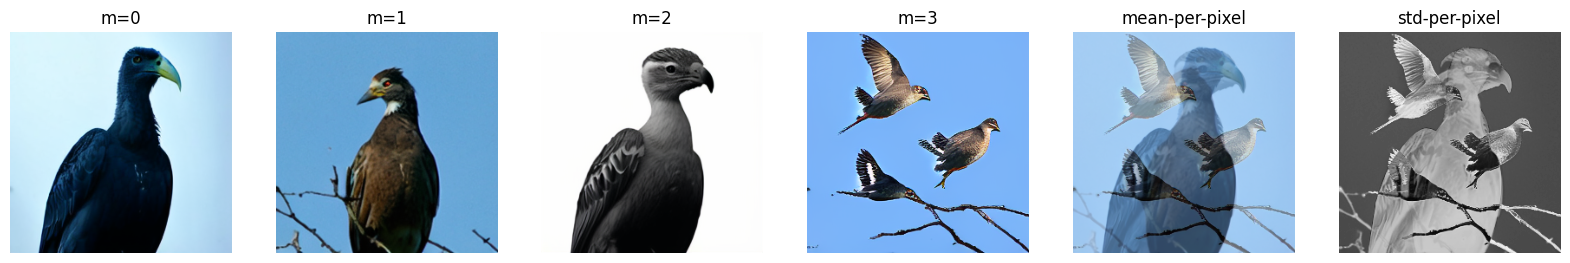

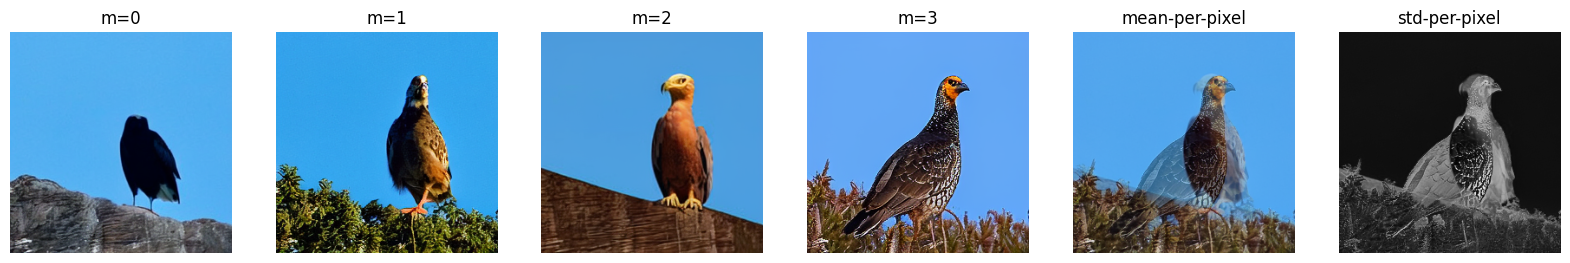

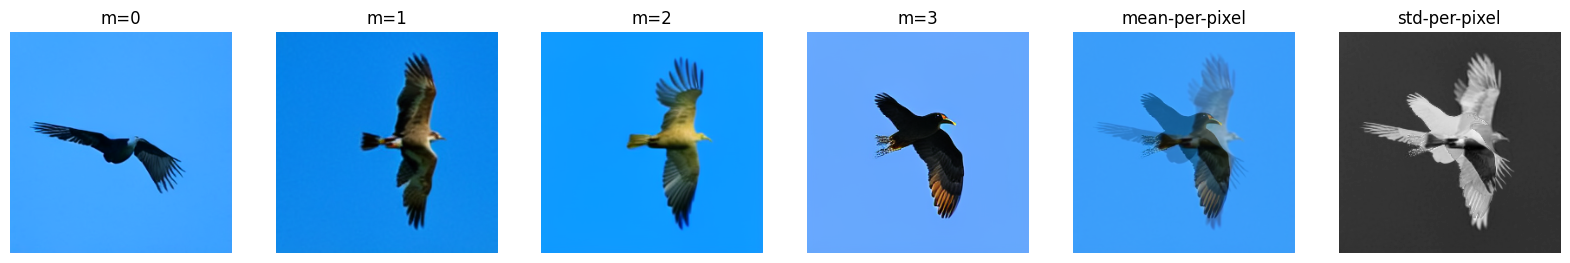

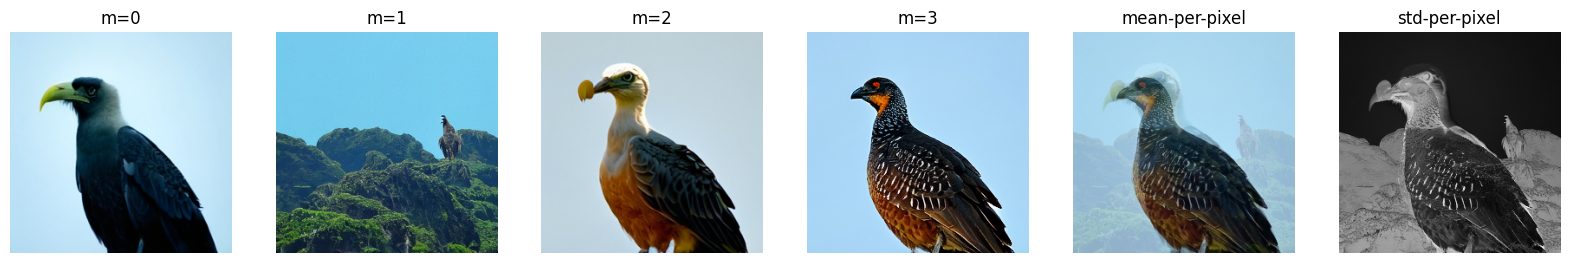

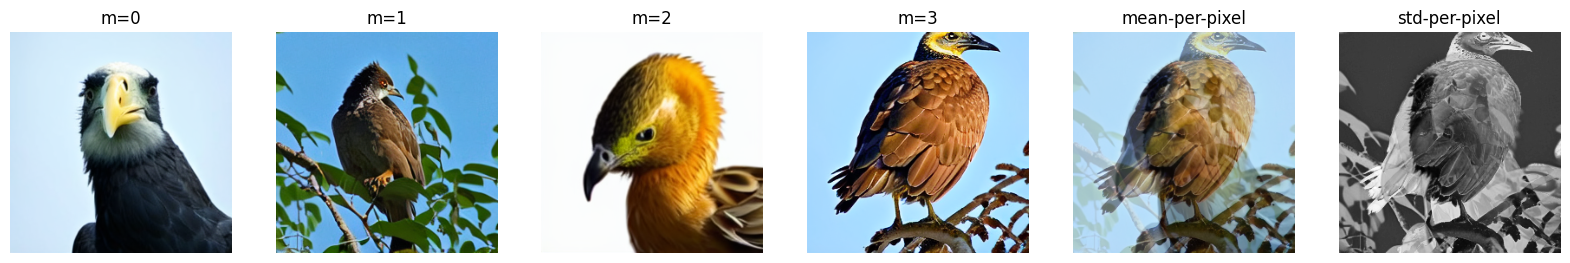

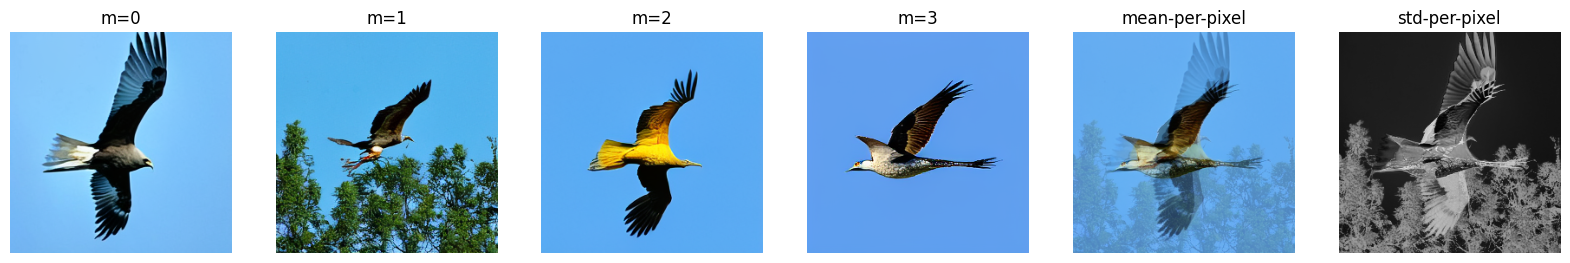

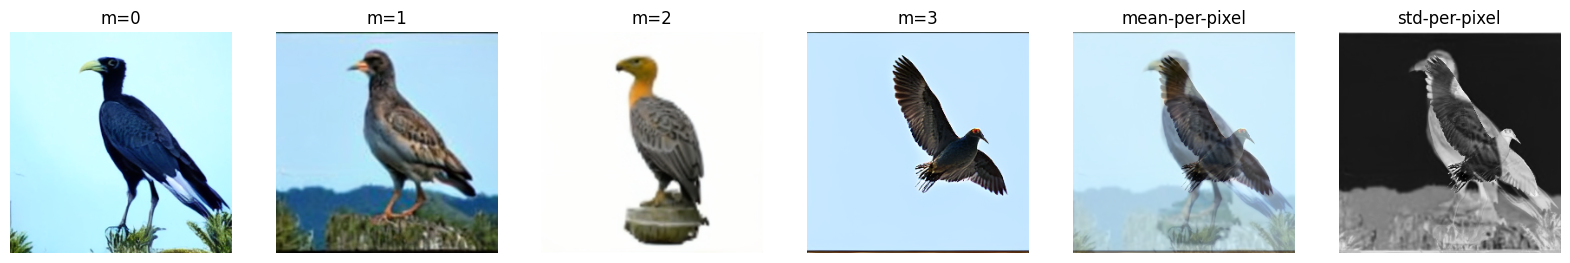

In [10]:
np.random.seed(0)
idx = np.random.choice(data.shape[1], 10, replace=False)

plot_ensemble_preds(data, idx=idx, M=4)
# plot_ensemble_preds(data, idx=idx_sorted[:25], M=4)
# plot_ensemble_preds(data, idx=idx_sorted[::-1][:25], M=4)
# plot_ensemble_preds(data, idx=[964, 776], M=4)

## 2) Plot Best and Worst Generations (based on epistemic uncertainty)

In [15]:
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1/0/all_imgs.npy"
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/0/all_imgs.npy"
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991/0/all_imgs.npy"
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_991/0/all_imgs.npy"
img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_22/0/all_imgs.npy"
# img_path = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_854/0/all_imgs.npy"
imgs_de = np.load(img_path)

# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1/cos_sim.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/cos_sim_fid.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991/cos_sim.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_854/cos_sim.npy")

# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/cos_sim_clip.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_854/cos_sim_clip.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100_991/cos_sim_clip.npy")
# cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_991/cos_sim_clip.npy")
cos_sim = np.load("logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_1_22/cos_sim_clip.npy")


idx_sorted = np.argsort(cos_sim)[::-1]

In [16]:
idx_sorted[::-1][:10]

array([60, 19, 84, 65, 83, 86, 50, 57, 62, 21])

In [17]:
imgs_de.shape, idx_sorted.shape

((100, 3, 256, 256), (100,))

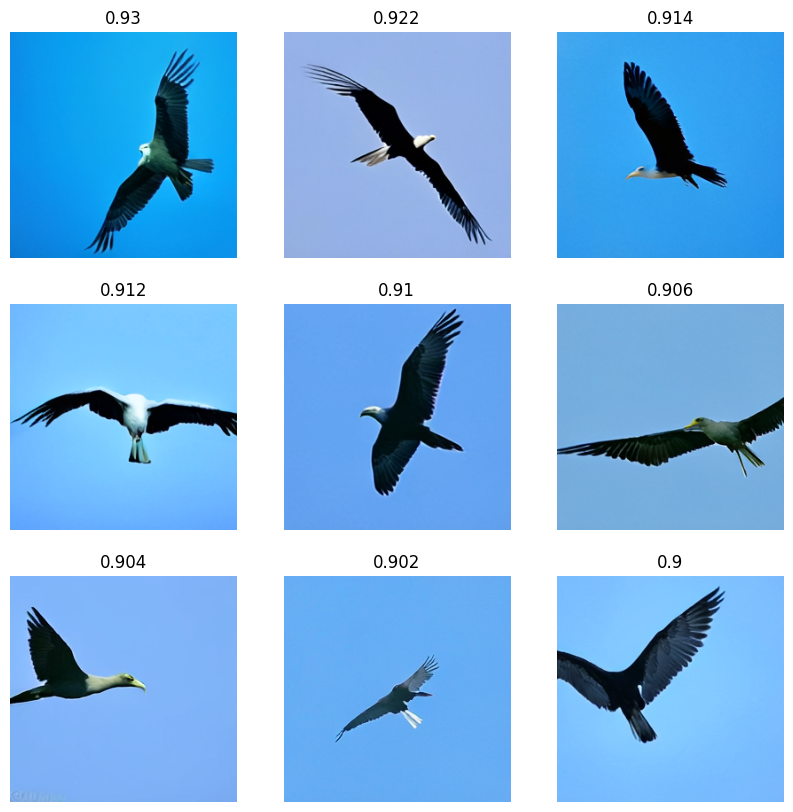

In [20]:
N = 3

fig, axs = plt.subplots(N, N, figsize=(10, 10))
k = 0
for i in range(N):
    for j in range(N):
        axs[i, j].imshow(np.transpose(imgs_de[idx_sorted[k]], (1, 2, 0)))
        axs[i, j].set_title(round(cos_sim[idx_sorted[k]], 3))
        axs[i, j].axis("off")
        k += 1

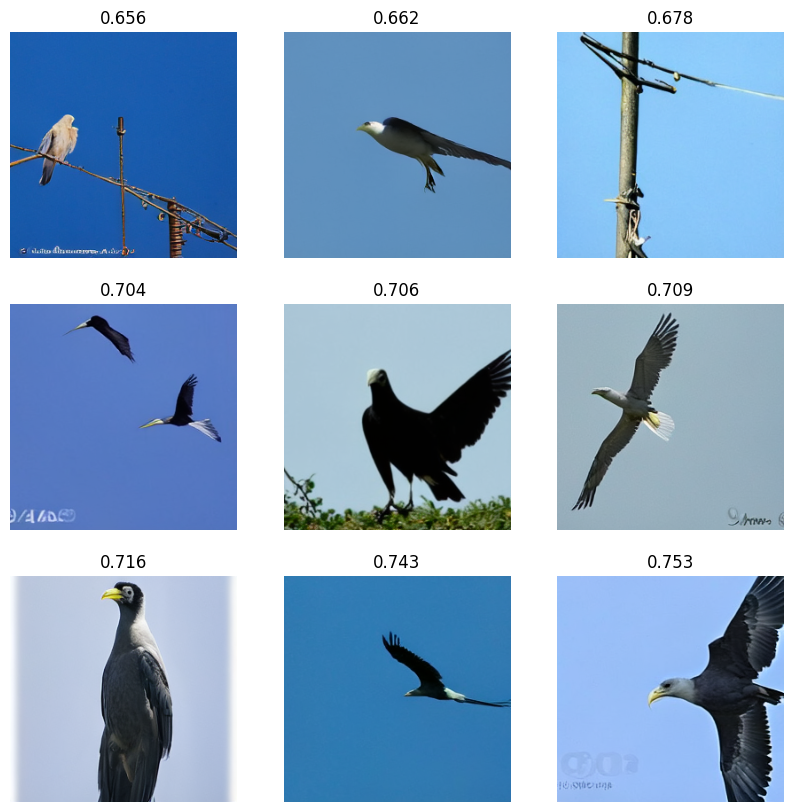

In [21]:
fig, axs = plt.subplots(N, N, figsize=(10, 10))
k = 0
for i in range(N):
    for j in range(N):
        axs[i, j].imshow(np.transpose(imgs_de[idx_sorted[::-1][k]], (1, 2, 0)))
        axs[i, j].set_title(round(cos_sim[idx_sorted[::-1][k]], 3))
        axs[i, j].axis("off")
        k += 1

## 3) Epistemic Uncertainty Debug

In [18]:
# i = 964
i = 776

In [19]:
PATH_ROOT = "logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100"
M = 4

fid_features = []
fid_predictives = []
for model_id in range(M):
    path = f"{PATH_ROOT}/{model_id}/fid_features.pt"
    fid_features.append(torch.load(path))
    path = f"{PATH_ROOT}/{model_id}/fid_predictives.pt"
    fid_predictives.append(torch.load(path))

fid_vecs = torch.stack([fid_features[m][i,:] for m in range(M)], dim=0).cpu().numpy()
fid_preds = torch.stack([fid_predictives[m][i,:] for m in range(M)], dim=0).cpu().numpy()

In [20]:
fid_vecs.shape, fid_preds.shape

((4, 2048), (4, 1008))

In [21]:
def cos_sim(vecs):
    norms = np.linalg.norm(vecs, axis=1, keepdims=True)
    normalized_vectors = vecs / norms
    
    # Compute pairwise cosine similarity
    similarities = np.dot(normalized_vectors, normalized_vectors.T)
    
    # Extract the upper triangular part (excluding diagonal) to get unique pairs
    pairwise_similarities = similarities[np.triu_indices(4, k=1)]

    return  np.mean(pairwise_similarities)

In [22]:
cos_sim(fid_vecs)

0.4343181606736188

In [23]:
fid_vecs.std(axis=0).mean()

0.22821712522738602

In [24]:
np.abs(fid_vecs[0, :] - fid_vecs[1, :]).sum()

622.906040222193

In [25]:
fid_preds.argmax(axis=1)

array([380, 332, 649, 480])

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, preprocess = clip.load("ViT-B/32", device=device)

clip_vecs = []
for m in range(M):
    image = preprocess(Image.open(f"logs/bootstrapped_imagenet_5/certain_vs_uncertain/all_samples_100/{m}/image_{i}.png")).unsqueeze(0).to(device)
    
    with torch.no_grad():
        clip_vecs.append(model.encode_image(image))

cuda


In [27]:
clip_vecs = torch.concat(clip_vecs, dim=0).cpu().numpy()

In [28]:
clip_vecs.shape

(4, 512)

In [29]:
cos_sim(clip_vecs)

0.887